10.5377426885
10.5377426885
10.5377426885
1.17372310914
0.715132587006
0.522391458744
0.414432984489
0.344881389769
0.296123297206
0.259941390166
0.231967684141
0.209658745031
Final w: [ 6.68237736  1.47175354  1.79596947]


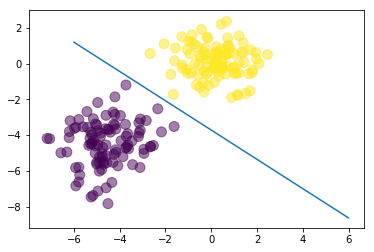

In [13]:
# demonstrate how to calculate the output of a logistics unit using a python
#the data X and the weight w are randomly assigned from a standard normal distribution
import numpy as np
N= 100
D=2

X=np.random.randn(N,D)
X[:50 , :]=X[:50, :]-2*np.ones((50 ,D))
X[:50 , :]=X[:50 , :]-2-np.ones((50 , D))
ones=np.ones((N,1))
#paste the X and ones along the column
Xb = np.concatenate((ones , X), axis=1)
T = np.array([0]*50+[1]*50)
w=np.random.randn(D+1)
z=Xb.dot(w)
def sigmoid(z):
    return(1/(1+np.exp(-z)))
Y= sigmoid(z)
#calculate the cross entropy error function
def cross_entropy(T,Y):
    E=0
    for i in range(len(T)):
        if T[i]==1:
            E-=np.log(Y[i])
        else:
            E-=np.log(1-Y[i])
    return E
print (cross_entropy(T,Y))

#w=np.array([0,4,4])

z=Xb.dot(w)
Y=sigmoid(z)
print(cross_entropy(T,Y))

learning_rate=0.1
for i in range(100):
    if i % 10==0:
        print(cross_entropy(T,Y))
    w+= learning_rate * Xb.T.dot((T)-Y)
    
    Y=sigmoid(Xb.dot(w))
print('Final w:' , w)
import matplotlib.pyplot as plt
plt.scatter(X[: ,0] ,X[: ,1], c=T , s=100 , alpha=0.5)
x_axis=np.linspace(-6,6,100)
y_axis=-(w[0]+x_axis*w[1])/w[2]
plt.plot(x_axis , y_axis)
plt.show()

21.8614669427
0.15033696909
0.127683442044
0.111349804451
0.0989302369789
0.089129049729
0.0811768274813
0.0745839723716
0.0690224027795
0.0642632195227
Final w: [-0.55107038  3.69220665  3.42675818]


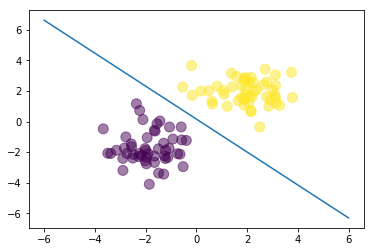

In [7]:
import numpy as np
import matplotlib.pyplot as plt

N = 100
D = 2


X = np.random.randn(N,D)

# center the first 50 points at (-2,-2)
X[:50,:] = X[:50,:] - 2*np.ones((50,D))

# center the last 50 points at (2, 2)
X[50:,:] = X[50:,:] + 2*np.ones((50,D))

# labels: first 50 are 0, last 50 are 1
T = np.array([0]*50 + [1]*50)

# add a column of ones
# ones = np.array([[1]*N]).T # old
ones = np.ones((N, 1))
Xb = np.concatenate((ones, X), axis=1)

# randomly initialize the weights
w = np.random.randn(D + 1)

# calculate the model output
z = Xb.dot(w)

def sigmoid(z):
      return (1/(1 + np.exp(-z)))


Y = sigmoid(z)

# calculate the cross-entropy error
def cross_entropy(T, Y):
        E = 0
        for i in range(len(T)):
            if T[i] == 1:
                E -= np.log(Y[i])
            else:
                E -= np.log(1 - Y[i])
        return E


# let's do gradient descent 100 times
learning_rate = 0.1
for i in range(100):
        if i % 10 == 0:
            print( cross_entropy(T, Y))

        # gradient descent weight udpate
        # w += learning_rate * np.dot((T - Y).T, Xb) # old
        w += learning_rate * Xb.T.dot(T - Y)

        # recalculate Y
        Y = sigmoid(Xb.dot(w))


print( "Final w:", w)

# plot the data and separating line
plt.scatter(X[:,0], X[:,1], c=T, s=100, alpha=0.5)
x_axis = np.linspace(-6, 6, 100)
y_axis = -(w[0] + x_axis*w[1]) / w[2]
plt.plot(x_axis, y_axis)
plt.show()

In [11]:
print(Y)


[  1.38531179e-18   6.54090726e-18   5.61196090e-19   9.30557082e-14
   3.17247263e-16   2.46975372e-18   3.11332428e-16   2.59142188e-15
   8.58532188e-19   3.95377421e-17   1.18293696e-14   2.96805602e-19
   1.05027213e-17   1.77091565e-23   4.04068996e-20   1.55236570e-17
   1.83202053e-17   3.04847235e-15   2.90431155e-20   6.67793081e-19
   5.72034732e-15   2.13382196e-15   4.62654396e-18   4.37556813e-17
   1.36717445e-15   1.10825341e-24   3.06635968e-17   3.07626872e-15
   5.51316917e-19   1.30087178e-17   3.82626704e-22   4.86014908e-17
   9.95776800e-17   5.26759086e-15   3.67869143e-17   1.22347176e-20
   5.96448660e-17   3.83986254e-17   3.65850772e-16   1.15907707e-19
   1.29950655e-17   2.24257135e-16   6.88284567e-16   6.34181647e-14
   7.96820720e-15   5.07533732e-21   1.05555755e-16   6.29670975e-16
   1.92124555e-13   9.52661551e-18   8.92211846e-01   1.70615633e-01
   5.21027833e-01   1.27785695e-01   5.34929173e-01   9.87626810e-01
   9.27848775e-01   9.95242611e-01

In [16]:
w=np.array([0,4,4])
w1=np.random.randn(D+1)
print(w)
print(w1)

[0 4 4]
[ 1.09293366  1.13930314  0.93250231]


In [13]:
np.info(Y)

class:  ndarray
shape:  (100,)
strides:  (8,)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x2710ba29c50
byteorder:  little
byteswap:  False
type: float64


In [14]:
np.info(T)

class:  ndarray
shape:  (100,)
strides:  (4,)
itemsize:  4
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x2710c9a5d80
byteorder:  little
byteswap:  False
type: int32


In [15]:
np.info(Xb)


class:  ndarray
shape:  (100, 3)
strides:  (24, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x2710bd51140
byteorder:  little
byteswap:  False
type: float64
